In [80]:
# Dependencies and Setup
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from math import trunc
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data




In [81]:

clinical_test_data = pd.read_csv('raw_data/clinicaltrial_data.csv')
mouse_test_data = pd.read_csv('raw_data/mouse_drug_data.csv')
mouse_test_data.head()
clinical_test_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


## Tumor Response to Treatment

In [82]:
combined = pd.merge(clinical_test_data, mouse_test_data,on ="Mouse ID",how='outer')
combined.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [83]:
Tumor_response =  combined.groupby(['Drug','Timepoint']).mean()['Tumor Volume (mm3)']
Tumor_response.head()

Drug       Timepoint
Capomulin  0            45.000000
           5            44.266086
           10           43.084291
           15           42.064317
           20           40.716325
Name: Tumor Volume (mm3), dtype: float64

In [84]:
Tumor_response = pd.pivot_table(combined, index='Timepoint', columns='Drug', values='Tumor Volume (mm3)', aggfunc = np.mean)
print(Tumor_response)

Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo  \
Timepoint                                                                     
0          45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
5          44.266086  46.503051  47.062001  47.389175  46.796098  47.125589   
10         43.084291  48.285125  49.403909  49.582269  48.694210  49.423329   
15         42.064317  50.094055  51.296397  52.399974  50.933018  51.359742   
20         40.716325  52.157049  53.197691  54.920935  53.644087  54.364417   
25         39.939528  54.287674  55.715252  57.678982  56.731968  57.482574   
30         38.769339  56.769517  58.299397  60.994507  59.559509  59.809063   
35         37.816839  58.827548  60.742461  63.371686  62.685087  62.420615   
40         36.958001  61.467895  63.162824  66.068580  65.600754  65.052675   
45         36.236114  64.132421  65.755562  70.662958  69.265506  68.084082   

Drug        Propriva   Ramicane   Stelasyn  Zonifer

In [85]:
Tumor_volume = Tumor_response.mean()
Tumor_volume

Drug
Capomulin    40.485084
Ceftamin     53.752434
Infubinol    54.963549
Ketapril     56.806906
Naftisol     55.891024
Placebo      56.012209
Propriva     54.911934
Ramicane     39.986931
Stelasyn     55.981636
Zoniferol    54.660451
dtype: float64

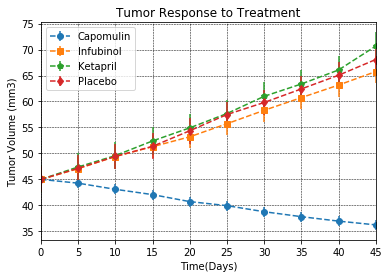

In [86]:
Timepoint = Tumor_response.index
plt.figure(figsize=(6,4))
plt.errorbar(Timepoint, Tumor_response['Capomulin'],yerr=Tumor_response['Capomulin'].sem(), marker ='o', linestyle='--', label="Capomulin")
plt.errorbar(Timepoint, Tumor_response['Infubinol'],yerr=Tumor_response['Infubinol'].sem(), marker ='s', linestyle='--', label="Infubinol")
plt.errorbar(Timepoint, Tumor_response['Ketapril'],yerr=Tumor_response['Ketapril'].sem(), marker ='p', linestyle='--', label="Ketapril")
plt.errorbar(Timepoint, Tumor_response['Placebo'],yerr=Tumor_response['Placebo'].sem(), marker ='d', linestyle='--', label="Placebo")

plt.gca().set(xlabel = 'Time(Days)', ylabel = 'Tumor Volume (mm3)',title = 'Tumor Response to Treatment',xlim = (0,max(Timepoint)))
plt.legend(loc = 'best', frameon=True)
plt.grid()
plt.show()


In [87]:
Timepoint_response =  combined.groupby(['Drug','Timepoint']).mean()[['Metastatic Sites']]
Timepoint_response.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [88]:
Metastatic_sites = pd.pivot_table(Timepoint_response, index='Timepoint', columns='Drug', values='Metastatic Sites', aggfunc = np.mean)
Metastatic_sites.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


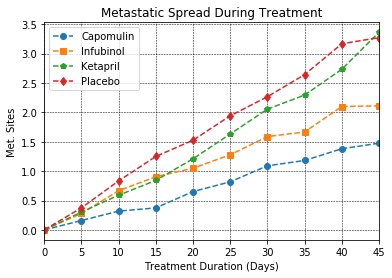

In [89]:
Metastatic = Metastatic_sites.index
plt.figure(figsize=(6,4))

plt.plot(Metastatic, Metastatic_sites['Capomulin'], marker ='o', linestyle='--', label="Capomulin")

plt.plot(Metastatic, Metastatic_sites['Infubinol'], marker ='s', linestyle='--', label="Infubinol")
plt.plot(Metastatic, Metastatic_sites['Ketapril'], marker ='p', linestyle='--', label="Ketapril")

plt.plot(Metastatic, Metastatic_sites['Placebo'], marker ='d', linestyle='--', label="Placebo")

plt.gca().set(xlabel = 'Treatment Duration (Days)', ylabel = 'Met. Sites',title = 'Metastatic Spread During Treatment',xlim = (0,max(Metastatic)))
plt.legend(loc = 'best', frameon=True)
plt.grid()
plt.show()

In [90]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

## Survival Rates

In [91]:
mouse_response =  combined.groupby(['Drug','Timepoint']).count()[['Mouse ID']]
mouse_response.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [92]:
Survival_percentage = Survival_pivot.copy()
Survival_percentage = round(Survival_percentage.apply(lambda c: c / c.max() * 100, axis=0),2)
Survival_percentage

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.00,100.0,100.00,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.15,100.0,96.15,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.46,96.0,88.46,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.38,96.0,88.46,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.38,92.0,80.77,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.85,92.0,73.08,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.00,92.0,69.23,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.46,84.0,61.54,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.62,80.0,46.15,56.0


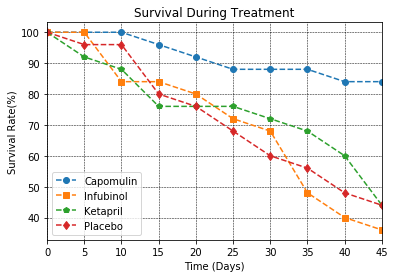

In [93]:
Survival_rate =  Survival_percentage.index

plt.figure(figsize=(6,4))
plt.plot(Survival_rate, Survival_percentage['Capomulin'], marker ='o', linestyle='--', label="Capomulin")
plt.plot(Survival_rate, Survival_percentage['Infubinol'], marker ='s', linestyle='--', label="Infubinol")
plt.plot(Survival_rate, Survival_percentage['Ketapril'], marker ='p', linestyle='--', label="Ketapril")
plt.plot(Survival_rate, Survival_percentage['Placebo'], marker ='d', linestyle='--', label="Placebo")
plt.gca().set(xlabel = 'Time (Days)', ylabel = 'Survival Rate(%)',title = 'Survival During Treatment',xlim = (0,max(Survival_rate)))
plt.legend(loc = 'best', frameon=True)
plt.grid()
plt.show()

## Summary Bar Graph

In [94]:
# Calculate the percent changes for each drug

# Display the data to confirm
TumorChangePercent = (((Tumor_response.iloc[-1]-Tumor_response.iloc[0])/Tumor_response.iloc[0])*100).to_frame("% Change")
TumorChangePercent

,% Change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


In [95]:
TumorChangePercentP = TumorChangePercent.loc[["Capomulin","Infubinol","Ketapril","Placebo"]]
print(TumorChangePercentP)

            % Change
Drug                
Capomulin -19.475303
Infubinol  46.123472
Ketapril   57.028795
Placebo    51.297960


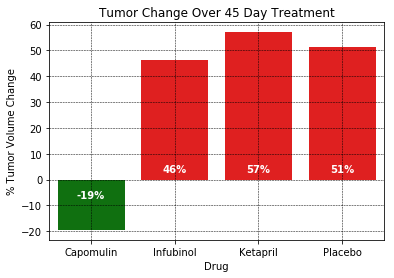

In [96]:
x=TumorChangePercentP.index
y=TumorChangePercentP['% Change']
plt.figure(figsize=(6,4))
colors = ['red' if _y >=0 else 'green' for _y in y]
ax = sn.barplot(x, y, palette=colors)
for n, (label, _y) in enumerate(zip(x, y)):
    if _y <= 0:
        ax.annotate(
            s='{:d}%'.format(trunc(_y)), xy=(n, -10), ha='center',va='center',
            xytext=(0,10), color='w', textcoords='offset points', weight='bold')
    else:
        ax.annotate(
            s='{:d}%'.format(trunc(_y)), xy=(n, 0), ha='center',va='center',
            xytext=(0,10), color='w', textcoords='offset points', weight='bold')  
plt.gca().set(xlabel='Drug', ylabel='% Tumor Volume Change', title='Tumor Change Over 45 Day Treatment')
plt.rc('grid', linestyle="--", color='black', linewidth=0.5)
plt.grid(True)
plt.show()